# Engenharia de Características e Regressão Polinomial


## Objetivos
Com este código você irá:
- explorar a Engenharia de Características e a regressão polinomial. Isso permite o uso de regressão linear para ajustar funções mais complexas (funções polinomiais, por exemplo).


In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=3)  #Reduz precisão ao dar print das arrays numpy

## Engenharia de Características e Regressão Polinomial: Uma revisão

A regressão linear provê uma forma de construção de modelos do tipo:

$$f_{\mathbf{w},b} = w_0x_0 + w_1x_1+ ... + w_{n-1}x_{n-1} + b \tag{1}$$ 

O que acontece se suas características (seus dados) são não lineares ou combinações de múltiplas características? Por exemplo, o preço de casas tende ser não linear com a área, penalizando casas muito pequenas ou casas muito grandes. Como construir um modelo que se ajusta a esse comportamento?


## Características Polinomiais

Nós estamos considerando aqui um cenário onde os dados têm um comportamento não linear. Vamos começar com uma função quadrática bastante simples: $y = 1+x^2$.

Abaixo nós criamos os dados:

In [4]:
# Criando os dados
x = np.arange(0, 20, 1) # resultado tem shape (20,)
y = 1 + x**2
X = x.reshape(-1,1) # resultado tem shape (20,1)


### Nossa própria biblioteca de funções

Nesse código usaremos também um arquivo adicional denominado "nossa_biblioteca_de_funcoes.py". Se você abrir o arquivo, perceberá que trata-se apenas de um arquivo com as funções que implementam o Método do Gradiente e mais algumas funções adicionais, como a função *normalizacao_zscore* (todas já foram vistas em atividades de programação interiores). Usaremos esse arquivo para armazenar funções já desenvolvidas em códigos anteriores e que poderão ser utilizadas também no presente código e nos seguintes.

Para carregarmos as funções que estão nessa biblioteca e que usaremos aqui, usaremos o comando abaixo:

In [5]:
from nossa_biblioteca_de_funcoes import metodo_do_gradiente, calcula_custo, calcula_gradiente, normalizacao_zscore

Abaixo estimamos uma reta $f_{w,b} = wx+b$ para esses dados:

Iteração    0: Custo  1657.56   
Iteração  200: Custo   588.48   
Iteração  400: Custo   490.10   
Iteração  600: Custo   456.43   
Iteração  800: Custo   444.90   
Iteração 1000: Custo   440.95   
Iteração 1200: Custo   439.60   
Iteração 1400: Custo   439.14   
Iteração 1600: Custo   438.98   
Iteração 1800: Custo   438.93   
b,w encontrados pelo método do gradiente: -55.73,[18.979] 


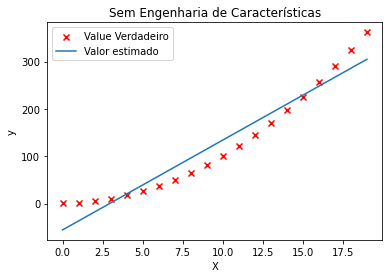

In [6]:
# inicializando parâmetros
initial_w = np.array([0.0])
initial_b = 0
# parâmetros para rodar o Método do Gradiente:
iterations = 2000
alpha      = 0.01
# Rodando o Método do gradiente 
w_final, b_final, J_hist = metodo_do_gradiente(X, y, initial_w, initial_b,
                                                    calcula_custo, calcula_gradiente, 
                                                    alpha, iterations)
print(f"b,w encontrados pelo método do gradiente: {b_final:0.2f},{w_final} ")

# Plotando os resultados
plt.scatter(x, y, marker='x', c='r', label="Value Verdadeiro"); plt.title("Sem Engenharia de Características")
plt.plot(x,X@w_final + b_final, label="Valor estimado");  plt.xlabel("X"); plt.ylabel("y"); plt.legend(); plt.show()

Bem, como esperado, não obtivemos uma aproximação muito boa. O que precisamos é de algo como $y= w_0x_0^2 + b$, ou seja, de uma **característica polinomial** no nosso modelo.

Para obter isso, você pode modificar os *dados de entrada* para $criar$ as características desejadas. Abaixo, trocarmos `X` por `X**2` no código:

In [7]:
# Característica polinomial: 
X = x**2
X = X.reshape(-1, 1) # X deve ser uma matriz 2-D

Iteração    0: Custo  7329.22   
Iteração 1000: Custo     0.22   
Iteração 2000: Custo     0.22   
Iteração 3000: Custo     0.22   
Iteração 4000: Custo     0.22   
Iteração 5000: Custo     0.22   
Iteração 6000: Custo     0.21   
Iteração 7000: Custo     0.21   
Iteração 8000: Custo     0.21   
Iteração 9000: Custo     0.21   
b,w encontrados pelo método do gradiente: 0.05,[1.004] 


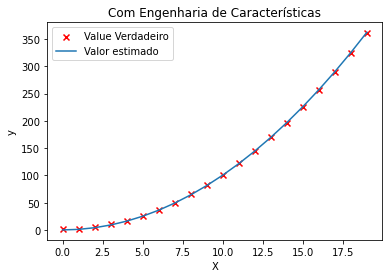

In [8]:
# inicializando parâmetros
initial_w = np.array([0.0])
initial_b = 0
# parâmetros para rodar o Método do Gradiente:
iterations = 10000
alpha      = 0.00001 # Veja que foi necessário reduzir o alpha drasticamente
# Rodando o Método do gradiente 

w_final, b_final, J_hist = metodo_do_gradiente(X, y, initial_w, initial_b,
                                                    calcula_custo, calcula_gradiente, 
                                                    alpha, iterations)
print(f"b,w encontrados pelo método do gradiente: {b_final:0.2f},{w_final} ")

# Plotando os resultados
plt.scatter(x, y, marker='x', c='r', label="Value Verdadeiro"); plt.title("Com Engenharia de Características")
plt.plot(x,X@w_final + b_final, label="Valor estimado");  plt.xlabel("X"); plt.ylabel("y"); plt.legend(); plt.show()

Uma aproximação quase perfeita! Note que os valores obtidos para $\mathbf{w}$ e b foram: `b=0.05, w=1.004`. 
O Método do Gradiente modificou nossos valores iniciais de forma a obter o modelo $y=0.05 + 1.004*x_0^2$, algo bem próximo do nosso alvo $y=1*x_0^2+1$.

### Selecionando Características

Acima, nós já sabíamos que o termo $x^2$ era necessário. Entretanto, nem sempre é óbvio quais características são necessárias. Uma ideia consiste em adicionar uma variedade de potenciais características para encontrar as mais úteis. Por exemplo, e se nós tentássemos: $y=w_0x_0 + w_1x_1^2 + w_2x_2^3+b$ ? 

Rodando as células abaixo

In [9]:
# Criando os dados
x = np.arange(0, 20, 1)
y = x**2

# potenciais características:
X = np.c_[x, x**2, x**3]  # a função c_ faz a concatenação.


Iteração    0: Custo  1140.29   
Iteração 1000: Custo   328.54   
Iteração 2000: Custo   280.44   
Iteração 3000: Custo   239.39   
Iteração 4000: Custo   204.34   
Iteração 5000: Custo   174.43   
Iteração 6000: Custo   148.90   
Iteração 7000: Custo   127.10   
Iteração 8000: Custo   108.49   
Iteração 9000: Custo    92.61   
b,w encontrados pelo método do gradiente: 0.01,[0.082 0.536 0.028] 


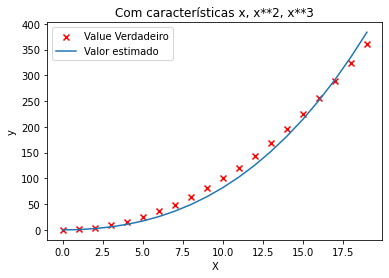

In [10]:
# inicializando parâmetros
m,n       = X.shape
initial_w = np.zeros((n,))
initial_b = 0
# parâmetros para rodar o Método do Gradiente:
iterations = 10000
alpha      = 0.0000001 # Veja que foi necessário reduzir o alpha ainda mais
# Rodando o Método do gradiente 

w_final, b_final, J_hist = metodo_do_gradiente(X, y, initial_w, initial_b,
                                                    calcula_custo, calcula_gradiente, 
                                                    alpha, iterations)
print(f"b,w encontrados pelo método do gradiente: {b_final:0.2f},{w_final} ")

# Plotando os resultados
plt.scatter(x, y, marker='x', c='r', label="Value Verdadeiro"); plt.title("Com características x, x**2, x**3")
plt.plot(x,X@w_final + b_final, label="Valor estimado");  plt.xlabel("X"); plt.ylabel("y"); plt.legend(); plt.show()

Note o valor de $\mathbf{w}$, `[0.08 0.54 0.03]` e b é `0.01`.Isso implica que o modelo após o treinamento é :
$$ 0.08x + 0.54x^2 + 0.03x^3 + 0.01 $$
O Método do Gradiente enfatizou que os dados são melhor explicados pelo termo $x^2$, aumentando o valor de $w_1$ em relação aos outros parâmetros.  
> O Método do Gradiente está escolhendo as características 'corretas' para nós enfatizando o parâmetro associado.

Vamos revisar as ideiais principais:
- O valor menor para um parâmetro implica que esse parâmetro é menos importante. No caso extremo, quando o peso do parâmetro é zero ou muito próximo de zero, a característica associada é inútil para modelar os dados.
- Acima, após o treinamento, o peso associado com a característica $x^2$ foi muito maior que os pesos associados para $x$ ou $x^3$ uma vez que essa característica é a mais útil para explicar o comportamento dos dados

### Escalonamento de Características

Conforme descrito no último código, se os dados têm características com diferentes ordens de grandeza, é recomendável aplicar o escalonamento de características para tornar o processo de treinamento mais rápido. No exemplo acima, tem-se os termos $x$, $x^2$ e $x^3$, que naturalmente possuem escalas bastante diferentes. Vamos então aplicar a normalização Z-Score

In [11]:
# Criando os dados alvo
x = np.arange(0,20,1)
y = x**2

X = np.c_[x, x**2, x**3] # c_ concatena os dados
print(f"Intervalo pico a pico por característica/coluna nos dados originais  :{np.ptp(X,axis=0)}")   


# Fazendo normalização Z-Score
X, X_mu, X_sigma = normalizacao_zscore(X)     
print(X.shape)
print(f"Intervalo pico a pico por característica/coluna nos dados escalonados:{np.ptp(X,axis=0)}")

Intervalo pico a pico por característica/coluna nos dados originais  :[  19  361 6859]
(20, 3)
Intervalo pico a pico por característica/coluna nos dados escalonados:[3.295 3.181 3.283]


Iteração    0: Custo  3852.70   
Iteração 1000: Custo     2.48   
Iteração 2000: Custo     1.12   
Iteração 3000: Custo     0.51   
Iteração 4000: Custo     0.23   
Iteração 5000: Custo     0.10   
Iteração 6000: Custo     0.05   
Iteração 7000: Custo     0.02   
Iteração 8000: Custo     0.01   
Iteração 9000: Custo     0.00   
b,w encontrados pelo método do gradiente: 123.50,[  0.546 112.103   0.875] 


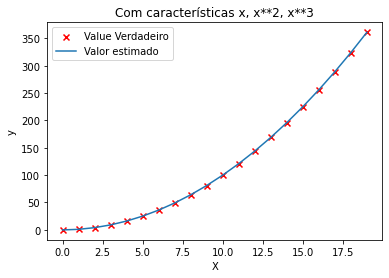

In [12]:
# inicializando parâmetros
m,n       = X.shape
initial_w = np.zeros((n,))
initial_b = 0
# parâmetros para rodar o Método do Gradiente:
iterations = 10000
alpha      = 0.3
# Rodando o Método do gradiente 

w_final, b_final, J_hist = metodo_do_gradiente(X, y, initial_w, initial_b,
                                                    calcula_custo, calcula_gradiente, 
                                                    alpha, iterations)
print(f"b,w encontrados pelo método do gradiente: {b_final:0.2f},{w_final} ")

# Plotando os resultados
plt.scatter(x, y, marker='x', c='r', label="Value Verdadeiro"); plt.title("Com características x, x**2, x**3")
plt.plot(x,X@w_final + b_final, label="Valor estimado");  plt.xlabel("X"); plt.ylabel("y"); plt.legend(); plt.show()

Novamente, após o treinamento, o peso associado com a característica $x^2$ é muito maior em comparação com os pesos associados com $x$ e $x^3$.

### Funções complexas

Com a engenharia de características, até mesmo funções complexas podem ser modeladas:

Iteração    0: Custo     0.22   
Iteração 50000: Custo     0.03   
Iteração 100000: Custo     0.02   
Iteração 150000: Custo     0.02   
Iteração 200000: Custo     0.02   
Iteração 250000: Custo     0.02   
Iteração 300000: Custo     0.02   
Iteração 350000: Custo     0.02   
Iteração 400000: Custo     0.02   
Iteração 450000: Custo     0.02   
b,w encontrados pelo método do gradiente: -0.01,[-2.710e+00 -3.607e+00  2.027e+01 -1.468e+00 -1.734e+01 -1.099e+01
  1.549e+01  3.316e-02 -7.672e-04  4.069e-02  7.172e-02 -4.192e-02
  6.058e-02] 


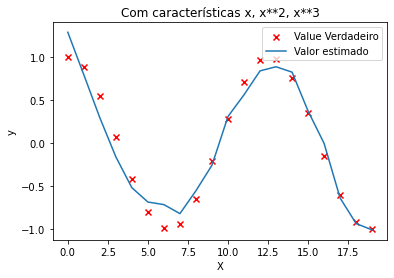

In [13]:
x = np.arange(0,20,1)
y = np.cos(x/2)

X = np.c_[x, x**2, x**3,x**4, x**5, x**6, x**7, x**8, x**9, x**10, x**11, x**12, x**13]
X, X_mu, X_sigma = normalizacao_zscore(X)     

# inicializando parâmetros
m,n       = X.shape
initial_w = np.zeros((n,))
initial_b = 0
# parâmetros para rodar o Método do Gradiente:
iterations = 500000
alpha      = 0.1 # Veja que foi necessário reduzir o alpha ainda mais
# Rodando o Método do gradiente 

w_final, b_final, J_hist = metodo_do_gradiente(X, y, initial_w, initial_b,
                                                    calcula_custo, calcula_gradiente, 
                                                    alpha, iterations)
print(f"b,w encontrados pelo método do gradiente: {b_final:0.2f},{w_final} ")

# Plotando os resultados
plt.scatter(x, y, marker='x', c='r', label="Value Verdadeiro"); plt.title("Com características x, x**2, x**3")
plt.plot(x,X@w_final + b_final, label="Valor estimado");  plt.xlabel("X"); plt.ylabel("y"); plt.legend(); plt.show()



## Parabéns!
Com este código, você:
- aprendeu como a regressão linear é capaz de modelar funções complexas, até mesmo funções altamente não lineares usando engenharia de características
- reconheceu que é importante aplicar escalonamento de características ao fazer engenharia de características